In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [4]:
dfc.shape

(8747, 7)

In [5]:
# only take 1991-2008 election data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

In [6]:
# only take winners data
dfcwin = dfc[dfc.winner == 'yes']
dfcwin.head()

,seat,year,party,name,votes,votes_pc,winner
5411,Noakhali-3,1991,BNP,Salah Uddin Kamran,11378.0,22.23,yes
5749,Mymensingh-8,1991,JaPa,Khurram Khan Chowdhury,18209.0,24.68,yes
5805,Barguna-2,1991,Independent,Nurul Islam Moni,19616.0,28.41,yes
5860,Kurigram-3,1991,AL,Md. Amjad Hossain Talukdar,20547.0,23.74,yes
5896,Noakhali-1,1991,BNP,Zainul Abdin Farroque,21418.0,31.97,yes


In [7]:
dfcwin.shape

(1150, 7)

In [9]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [11]:
# find total wins across 4 elections by parties other than AL and BNP
dfcwnm = dfcwin.groupby(['seat', 'party']).size().unstack(fill_value=0).drop(mainp, axis=1)
dfcwnm.head()

party,BAKSAL,BJP,CPB,Ganatantri Party,IJOF,Independent,Islami Oikya Jote,JP (Manju),JSD (Rab),JSD (Siraj),JaPa,Jamaat,Krishak Sramik Janata League,LDP,NAP (Muzaffar),NDP,Workers Party
seat,,,,,,,,,,,,,,,,,
Bagerhat-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bagerhat-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bagerhat-3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bagerhat-4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
Bandarban,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# drop IJOF (alliance) and independents
dfcwnm.drop(['IJOF', 'Independent'], axis=1, inplace=True)

In [13]:
# sum the total wins by parties other than AL and BNP for each seat
dfcwnm['total'] = dfcwnm.sum(axis=1)
dfcwnm.head()

party,BAKSAL,BJP,CPB,Ganatantri Party,Islami Oikya Jote,JP (Manju),JSD (Rab),JSD (Siraj),JaPa,Jamaat,Krishak Sramik Janata League,LDP,NAP (Muzaffar),NDP,Workers Party,total
seat,,,,,,,,,,,,,,,,
Bagerhat-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bagerhat-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bagerhat-3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bagerhat-4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
Bandarban,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# only keep data where parties other than AL and BNP won at least once
dfcwnm.drop(dfcwnm[dfcwnm.total == 0].index, inplace=True)
dfcwnm.head()

party,BAKSAL,BJP,CPB,Ganatantri Party,Islami Oikya Jote,JP (Manju),JSD (Rab),JSD (Siraj),JaPa,Jamaat,Krishak Sramik Janata League,LDP,NAP (Muzaffar),NDP,Workers Party,total
seat,,,,,,,,,,,,,,,,
Bagerhat-4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
Barguna-2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Barisal-2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2
Barisal-3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Barisal-6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [15]:
parties = dfcwnm.columns.to_list()
parties.remove('total')
print(parties)

['BAKSAL', 'BJP', 'CPB', 'Ganatantri Party', 'Islami Oikya Jote', 'JP (Manju)', 'JSD (Rab)', 'JSD (Siraj)', 'JaPa', 'Jamaat', 'Krishak Sramik Janata League', 'LDP', 'NAP (Muzaffar)', 'NDP', 'Workers Party']


In [16]:
# get list of winner parties for each seat
def getwp(row):
    plist = []
    for p in row.index:
        if p != 'total' and row[p] > 0:
            plist.append(p)
    return ', '.join(plist)

dfcwnm['party'] = dfcwnm.apply(getwp, axis=1)
dfcwnm.head()

party,BAKSAL,BJP,CPB,Ganatantri Party,Islami Oikya Jote,JP (Manju),JSD (Rab),JSD (Siraj),JaPa,Jamaat,Krishak Sramik Janata League,LDP,NAP (Muzaffar),NDP,Workers Party,total,party
seat,,,,,,,,,,,,,,,,,
Bagerhat-4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,Jamaat
Barguna-2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,Islami Oikya Jote
Barisal-2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,"JaPa, Workers Party"
Barisal-3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,JaPa
Barisal-6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,JaPa


In [17]:
dfcwnm.to_csv('dataout/not_mainp_wins.csv')

In [23]:
# join data with map data
mapwnm = pd.merge(bdmap, dfcwnm, how='left', left_on='seat', right_index=True)[bdmap.columns.to_list() + ['total', 'party']]
mapwnm.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,total,party
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",NaN,NaN
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",1.0,CPB
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",NaN,NaN
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",1.0,CPB
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",1.0,JaPa


In [24]:
# create category column for map plot
mapwnm['winp_category'] = mapwnm.party.apply(lambda x: 'only AL/BNP' if pd.isnull(x) else 'smaller parties')
mapwnm.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,total,party,winp_category
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",NaN,NaN,only AL/BNP
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",1.0,CPB,smaller parties
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",NaN,NaN,only AL/BNP
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",1.0,CPB,smaller parties
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",1.0,JaPa,smaller parties


In [25]:
# fill NaN values 
mapwnm.loc[pd.isnull(mapwnm.party), 'party'] = 'only AL/BNP'
mapwnm.loc[pd.isnull(mapwnm.total), 'total'] = 0
mapwnm.rename(columns={'party': 'winner_parties', 'total': 'small_party_win_count'}, inplace=True)
mapwnm.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,small_party_win_count,winner_parties,winp_category
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",0.0,only AL/BNP,only AL/BNP
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",1.0,CPB,smaller parties
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",0.0,only AL/BNP,only AL/BNP
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",1.0,CPB,smaller parties
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",1.0,JaPa,smaller parties


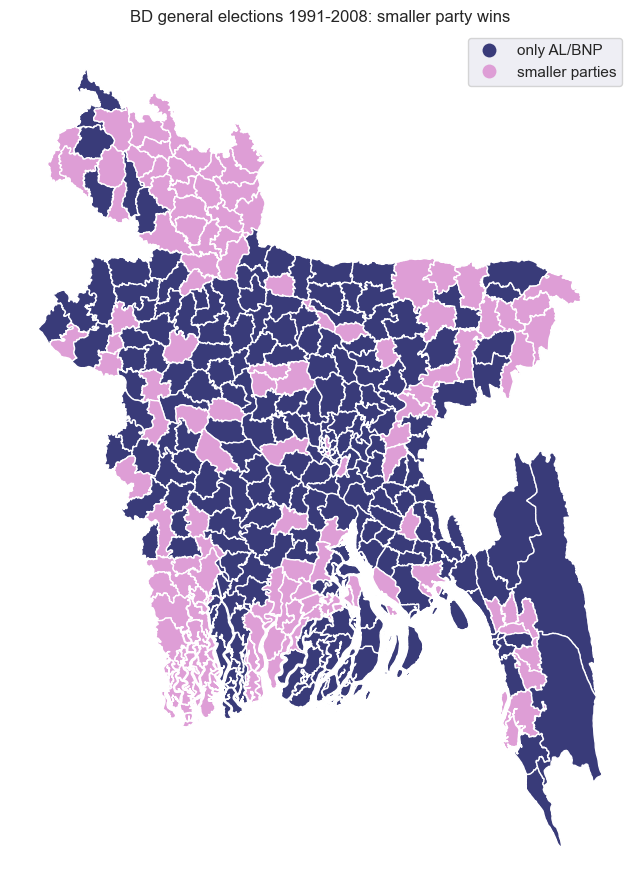

In [27]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))
mapwnm.plot(
    column='winp_category', 
    categorical=True,
    legend=True,
    cmap='tab20b', 
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "missing data",
    }
)

ax.set_axis_off()
ax.title.set_text("BD general elections 1991-2008: smaller party wins")
fig.savefig('fig/not_mainp_wins',bbox_inches='tight')

In [30]:
# save interactive map
fol = mapwnm.explore(
    column="winp_category", 
    tooltip="winp_category", 
    popup=True, 
    cmap='plasma', 
    style_kwds=dict(color="lightgrey"), 
)

fol.save('mapout/not_mainp_wins.html')